In [1]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot as pltt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
df1=pd.read_csv("Downloads/training_set_features.csv")
df1.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
df2=pd.read_csv('Downloads/training_set_labels.csv')
df2.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [4]:
df1['xyz_vaccine']=df2['xyz_vaccine']
df1['seasonal_vaccine']=df2['seasonal_vaccine']
df1.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [5]:
from sklearn.preprocessing import OrdinalEncoder
df1.drop(['health_insurance','employment_industry','employment_occupation'],axis=1,inplace=True)
modes = df1.mode().iloc[0]

# Fill missing values with the mode of each column
df1.fillna(modes, inplace=True)

ord_enc = OrdinalEncoder()
df1["age_group"] = ord_enc.fit_transform(df1[["age_group"]])
df1["education"] = ord_enc.fit_transform(df1[["education"]])
df1["race"] = ord_enc.fit_transform(df1[["race"]])
df1["sex"] = ord_enc.fit_transform(df1[["sex"]])
df1["income_poverty"] = ord_enc.fit_transform(df1[["income_poverty"]])
df1["marital_status"] = ord_enc.fit_transform(df1[["marital_status"]])
df1["rent_or_own"] = ord_enc.fit_transform(df1[["rent_or_own"]])
df1["employment_status"] = ord_enc.fit_transform(df1[["employment_status"]])
df1["hhs_geo_region"] = ord_enc.fit_transform(df1[["hhs_geo_region"]])
df1["census_msa"] = ord_enc.fit_transform(df1[["census_msa"]])

df1[["age_group","education","race","sex","income_poverty","marital_status"]].head(21)

,age_group,education,race,sex,income_poverty,marital_status
0,3.0,1.0,3.0,0.0,2.0,1.0
1,1.0,0.0,3.0,1.0,2.0,1.0
2,0.0,2.0,3.0,1.0,0.0,1.0
3,4.0,0.0,3.0,0.0,2.0,1.0
4,2.0,3.0,3.0,0.0,0.0,0.0
5,4.0,0.0,3.0,1.0,0.0,0.0
6,3.0,1.0,3.0,1.0,0.0,1.0
7,2.0,3.0,3.0,0.0,0.0,0.0
8,2.0,2.0,3.0,1.0,1.0,0.0
9,3.0,0.0,3.0,1.0,0.0,1.0


In [6]:
df1.isnull().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [28]:
X = df1.drop(['respondent_id','xyz_vaccine','seasonal_vaccine'], axis=1)
y = df1['xyz_vaccine']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3,random_state=42)
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
y_pred=lr.predict(X_val)
y_pred_cnt = lr.predict_proba(X_val)[:, 1]
f1 = f1_score(y_val, y_pred)
print(f"F1 score: {f1}")
auc_score = roc_auc_score(y_val, y_pred_cnt)
print("AUC-ROC Score:", auc_score)
mse=mean_squared_error(y_val, y_pred)
print(mse)

F1 score: 0.5175600739371535
AUC-ROC Score: 0.8213891016261933
0.16286035192811682


In [29]:
X = df1.drop(['respondent_id','xyz_vaccine','seasonal_vaccine'], axis=1)
y = df1['seasonal_vaccine']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3,random_state=42)
lr2 = LogisticRegression(max_iter=5000)
lr2.fit(X_train, y_train)
y_pred=lr2.predict(X_val)
y_pred_cnt = lr2.predict_proba(X_val)[:, 1]
f1 = f1_score(y_val, y_pred)
print(f"F1 score: {f1}")
auc_score = roc_auc_score(y_val, y_pred_cnt)
print("AUC-ROC Score:", auc_score)
mse=mean_squared_error(y_val, y_pred)
print(mse)

F1 score: 0.7562202963377131
AUC-ROC Score: 0.8491253354406373
0.21764632472232623


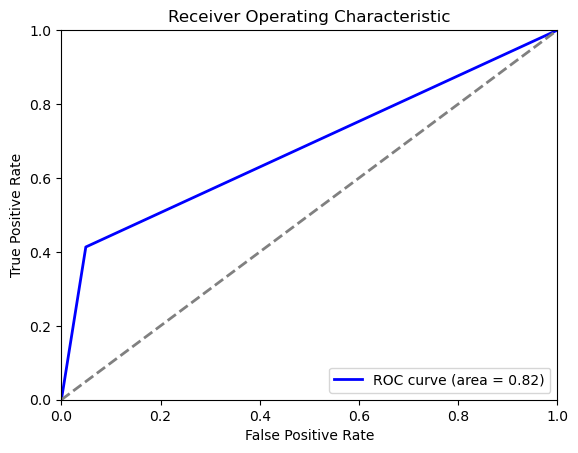

In [16]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

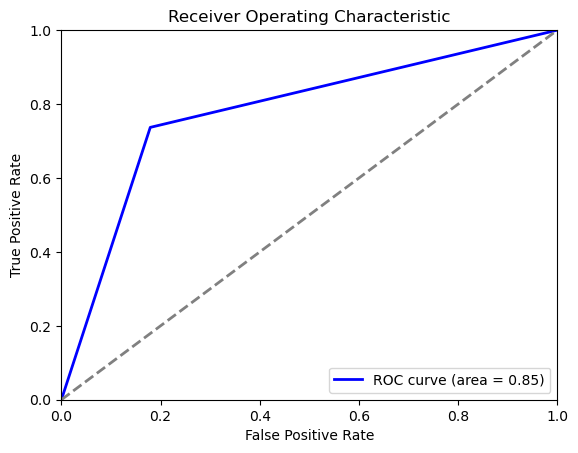

In [14]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [17]:
df3=pd.read_csv('Downloads/test_set_features.csv')
df3.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [18]:
from sklearn.preprocessing import OrdinalEncoder
df3.drop(['health_insurance','employment_industry','employment_occupation'],axis=1,inplace=True)
modes = df3.mode().iloc[0]

# Fill missing values with the mode of each column
df3.fillna(modes, inplace=True)

ord_enc = OrdinalEncoder()
df3["age_group"] = ord_enc.fit_transform(df3[["age_group"]])
df3["education"] = ord_enc.fit_transform(df3[["education"]])
df3["race"] = ord_enc.fit_transform(df3[["race"]])
df3["sex"] = ord_enc.fit_transform(df3[["sex"]])
df3["income_poverty"] = ord_enc.fit_transform(df3[["income_poverty"]])
df3["marital_status"] = ord_enc.fit_transform(df3[["marital_status"]])
df3["rent_or_own"] = ord_enc.fit_transform(df3[["rent_or_own"]])
df3["employment_status"] = ord_enc.fit_transform(df3[["employment_status"]])
df3["hhs_geo_region"] = ord_enc.fit_transform(df3[["hhs_geo_region"]])
df3["census_msa"] = ord_enc.fit_transform(df3[["census_msa"]])

In [19]:
df3.isnull().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [20]:
df3.drop(['respondent_id'],axis=1,inplace=True)

In [21]:
df4=pd.read_csv("Downloads/submission_format.csv")
df4.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7


In [22]:
df4.drop(['h1n1_vaccine','seasonal_vaccine'],axis=1,inplace=True)
df4.head()

,respondent_id
0,26707
1,26708
2,26709
3,26710
4,26711


In [34]:
y_test = lr.predict(df3)
y_test_cnt_1=lr.predict_proba(df3)[:,1]
y_test_cnt_1

array([0.07237616, 0.0472595 , 0.45827486, ..., 0.13672922, 0.0473029 ,
       0.55391712])

In [35]:
y_test = lr2.predict(df3)
y_test_cnt_2=lr2.predict_proba(df3)[:,1]
y_test_cnt_2

array([0.20387296, 0.05516075, 0.67466329, ..., 0.20669534, 0.42995259,
       0.53912695])

In [32]:
Index=df4['respondent_id']

In [36]:
result = pd.DataFrame({
    'respondent_id': Index,
    'h1n1_vaccine': y_test_cnt_1,
    'seasonal_vaccine':y_test_cnt_2
})

In [37]:
result

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.072376,0.203873
1,26708,0.047259,0.055161
2,26709,0.458275,0.674663
3,26710,0.494534,0.875496
4,26711,0.201177,0.450889
...,...,...,...
26703,53410,0.343331,0.527304
26704,53411,0.083758,0.291788
26705,53412,0.136729,0.206695
26706,53413,0.047303,0.429953


In [38]:
result.to_csv('Downloads/second.csv',index=False)